In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import datasets
ratings_df = pd.read_csv('ratings.dat', sep='::', header=None, names=['UserID', 'MovieID', 'Rating', 'Timestamp'])
movies_df = pd.read_csv('movies.dat', sep='::', header=None, names= ['MovieID', 'Title', 'Genres'])
users_df = pd.read_csv('users.dat', sep='::', header=None, names= ['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'])

In [3]:
ratings_df.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [4]:
movies_df.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
users_df.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [6]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [7]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int64 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [8]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


We can combine all the dataframes into a master data with specific columns.

In [9]:
user_rating_df = pd.merge(users_df, ratings_df, on='UserID')
user_rating_df.head()

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp
0,1,F,1,10,48067,1193,5,978300760
1,1,F,1,10,48067,661,3,978302109
2,1,F,1,10,48067,914,3,978301968
3,1,F,1,10,48067,3408,4,978300275
4,1,F,1,10,48067,2355,5,978824291


In [10]:
master_df = pd.merge(movies_df, user_rating_df, on='MovieID')
master_df = master_df[['MovieID', 'Title', 'UserID', 'Age', 'Occupation', 'Rating']]
master_df.head()

,MovieID,Title,UserID,Age,Occupation,Rating
0,1,Toy Story (1995),1,1,10,5
1,1,Toy Story (1995),6,50,9,4
2,1,Toy Story (1995),8,25,12,4
3,1,Toy Story (1995),9,25,17,5
4,1,Toy Story (1995),10,35,1,5


In [11]:
master_df.shape

(1000209, 6)

In [12]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   MovieID     1000209 non-null  int64 
 1   Title       1000209 non-null  object
 2   UserID      1000209 non-null  int64 
 3   Age         1000209 non-null  int64 
 4   Occupation  1000209 non-null  int64 
 5   Rating      1000209 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 53.4+ MB


Now we can analyze our data to get some insights.

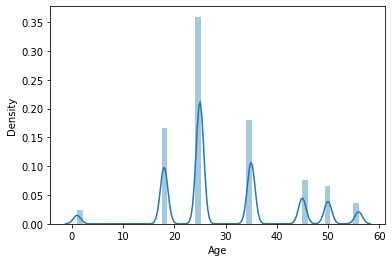

In [13]:
# Age Distribution
sns.distplot(master_df['Age'])
plt.show()

We can people age in between 0 and 56. Here the values are not actual age, rather 1 belongs to people under 18, 18 means 18 to 24 etc. Most of the people who watch movies and also give ratings are the people with age in between 20-30. As per the notation, these are the people with age 25 means people having age in between 25 to 34.

Max rating given to Toy story 5
Avg rating given to Toy story 4
Distribution as follows



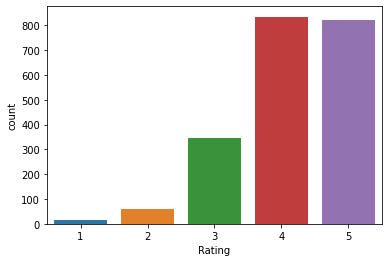

In [14]:
# User rating for movie Toy-story
toy_story_ratings = master_df[master_df['Title'] == 'Toy Story (1995)']['Rating']
print('Max rating given to Toy story', toy_story_ratings.max())
print('Avg rating given to Toy story', int(toy_story_ratings.mean()))
print('Distribution as follows\n')
sns.countplot(toy_story_ratings)
plt.show()

It seems Toy story is loved by many people as most of the people have given 4 and 5 ratings.

In [15]:
# Top 25 movies based on ratings

top_movies_by_ratings = (master_df.groupby('Title')['Rating'].mean()).sort_values(ascending=False).iloc[:25]
top_movies_by_ratings.index.values.tolist()

['Gate of Heavenly Peace, The (1995)',
 'Lured (1947)',
 'Ulysses (Ulisse) (1954)',
 'Smashing Time (1967)',
 'Follow the Bitch (1998)',
 'Song of Freedom (1936)',
 'Bittersweet Motel (2000)',
 'Baby, The (1973)',
 'One Little Indian (1973)',
 'Schlafes Bruder (Brother of Sleep) (1995)',
 'I Am Cuba (Soy Cuba/Ya Kuba) (1964)',
 'Lamerica (1994)',
 'Apple, The (Sib) (1998)',
 'Sanjuro (1962)',
 'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)',
 'Shawshank Redemption, The (1994)',
 'Godfather, The (1972)',
 'Close Shave, A (1995)',
 'Usual Suspects, The (1995)',
 "Schindler's List (1993)",
 'Wrong Trousers, The (1993)',
 'Dangerous Game (1993)',
 'Mamma Roma (1962)',
 'Inheritors, The (Die Siebtelbauern) (1998)',
 'Hour of the Pig, The (1993)']

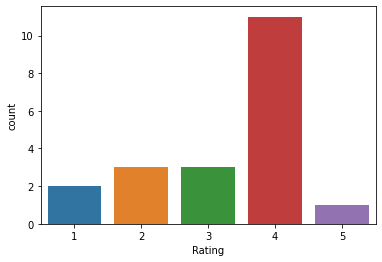

In [16]:
# Rating of all the movies rated by a user 2696
ratings_2696 = master_df[master_df['UserID'] == 2696]['Rating']
ratings_2696.values

sns.countplot(ratings_2696)
plt.show()

The user 2696 has given most of his/her ratigs as 4.

We can add Genres column to master dataset and do further analysis on that.

In [17]:
master_df = pd.merge(master_df, movies_df[['MovieID', 'Genres']], on='MovieID')
master_df.head()

,MovieID,Title,UserID,Age,Occupation,Rating,Genres
0,1,Toy Story (1995),1,1,10,5,Animation|Children's|Comedy
1,1,Toy Story (1995),6,50,9,4,Animation|Children's|Comedy
2,1,Toy Story (1995),8,25,12,4,Animation|Children's|Comedy
3,1,Toy Story (1995),9,25,17,5,Animation|Children's|Comedy
4,1,Toy Story (1995),10,35,1,5,Animation|Children's|Comedy


In [18]:
# Get unique Genres
master_df['Genres'] = master_df['Genres'].apply(lambda x: x.split('|'))
master_df['Genres'][:5]

0    [Animation, Children's, Comedy]
1    [Animation, Children's, Comedy]
2    [Animation, Children's, Comedy]
3    [Animation, Children's, Comedy]
4    [Animation, Children's, Comedy]
Name: Genres, dtype: object

In [19]:
unique_genres = set()
for genres in master_df['Genres']:
    unique_genres.update(genres)
unique_genres    

{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

We have total 18 genres across all the movies.

Do One Hot Encoding on the Genres (We can use CountVectorizer)

In [20]:
master_df['Genres'] = master_df['Genres'].apply(lambda x: ' '.join(x))
master_df['Genres'][:5]

0    Animation Children's Comedy
1    Animation Children's Comedy
2    Animation Children's Comedy
3    Animation Children's Comedy
4    Animation Children's Comedy
Name: Genres, dtype: object

In [21]:
cv = CountVectorizer()
encoded = cv.fit_transform(master_df['Genres'])
encoded_df = pd.DataFrame(encoded.toarray(), columns=cv.get_feature_names())
print(encoded_df.shape)
encoded_df.head()

(1000209, 20)


,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,fi,film,horror,musical,mystery,noir,romance,sci,thriller,war,western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
# combine it with master dataframe
master_df = pd.concat([master_df.drop('Genres', axis=1), encoded_df], axis=1)
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 26 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   MovieID      1000209 non-null  int64 
 1   Title        1000209 non-null  object
 2   UserID       1000209 non-null  int64 
 3   Age          1000209 non-null  int64 
 4   Occupation   1000209 non-null  int64 
 5   Rating       1000209 non-null  int64 
 6   action       1000209 non-null  int64 
 7   adventure    1000209 non-null  int64 
 8   animation    1000209 non-null  int64 
 9   children     1000209 non-null  int64 
 10  comedy       1000209 non-null  int64 
 11  crime        1000209 non-null  int64 
 12  documentary  1000209 non-null  int64 
 13  drama        1000209 non-null  int64 
 14  fantasy      1000209 non-null  int64 
 15  fi           1000209 non-null  int64 
 16  film         1000209 non-null  int64 
 17  horror       1000209 non-null  int64 
 18  musical      1000209 n

In [23]:
corr = master_df.corr()
corr

,MovieID,UserID,Age,Occupation,Rating,action,adventure,animation,children,comedy,...,film,horror,musical,mystery,noir,romance,sci,thriller,war,western
MovieID,1.000000,-0.017739,0.027575,0.008585,-0.064042,-0.042046,-0.082413,-0.014177,-0.071589,0.061667,...,-0.019655,0.057613,-0.059381,-0.028561,-0.019655,-0.118375,-0.011747,-0.058418,-0.081951,0.003940
UserID,-0.017739,1.000000,0.034688,-0.026698,0.012303,-0.002023,-0.000683,-0.007665,-0.004862,-0.003651,...,0.004701,-0.001392,-0.000222,0.004334,0.004701,0.006834,-0.003283,-0.001107,0.003502,0.004114
Age,0.027575,0.034688,1.000000,0.078371,0.056869,-0.030975,-0.016730,-0.047020,-0.052858,-0.044046,...,0.033495,-0.023901,0.005158,0.024308,0.033495,0.017503,-0.010879,-0.014100,0.038446,0.038177
Occupation,0.008585,-0.026698,0.078371,1.000000,0.006753,0.018347,0.014309,-0.003834,-0.006906,-0.006149,...,0.005246,0.001439,-0.007312,0.002421,0.005246,-0.014018,0.026250,0.008981,0.010264,0.005924
Rating,-0.064042,0.012303,0.056869,0.006753,1.000000,-0.047633,-0.036718,0.019670,-0.039829,-0.039622,...,0.060259,-0.094353,0.015643,0.015848,0.060259,0.009644,-0.044487,-0.004806,0.075688,0.007311
action,-0.042046,-0.002023,-0.030975,0.018347,-0.047633,1.000000,0.374961,-0.110294,-0.141314,-0.268092,...,-0.080288,-0.042733,-0.100432,-0.054084,-0.080288,-0.067830,0.319117,0.202756,0.135872,0.022242
adventure,-0.082413,-0.000683,-0.016730,0.014309,-0.036718,0.374961,1.000000,0.004732,0.098283,-0.124960,...,-0.014178,-0.057256,-0.022327,-0.043503,-0.014178,-0.024389,0.284190,-0.038423,0.016647,-0.011964
animation,-0.014177,-0.007665,-0.047020,-0.003834,0.019670,-0.110294,0.004732,1.000000,0.576204,0.018544,...,0.037013,-0.049730,0.335231,-0.042488,0.037013,-0.054540,-0.055526,-0.085713,-0.046114,-0.030908
children,-0.071589,-0.004862,-0.052858,-0.006906,-0.039829,-0.141314,0.098283,0.576204,1.000000,0.058711,...,-0.038033,-0.077099,0.312567,-0.052786,-0.038033,-0.084550,-0.038844,-0.132642,-0.066539,-0.031269
comedy,0.061667,-0.003651,-0.044046,-0.006149,-0.039622,-0.268092,-0.124960,0.018544,0.058711,1.000000,...,-0.101425,-0.093064,0.030566,-0.105346,-0.101425,0.112843,-0.187079,-0.299501,-0.127101,0.007927


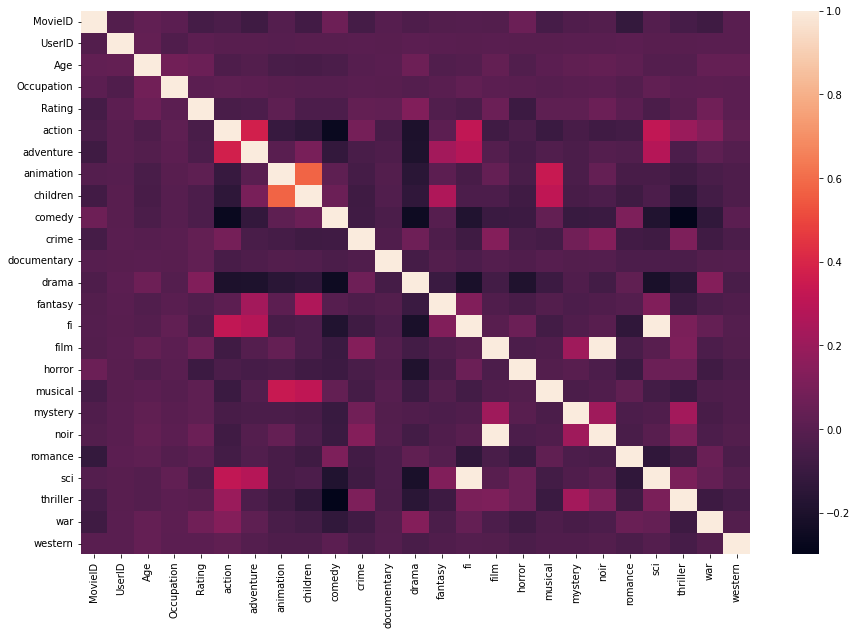

In [24]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr)
plt.xticks(rotation=90)
plt.show()

In [25]:
corr['Rating'].sort_values(ascending=False)[1:].index.values

array(['drama', 'war', 'noir', 'film', 'Age', 'crime', 'documentary',
       'animation', 'mystery', 'musical', 'UserID', 'romance', 'western',
       'Occupation', 'thriller', 'fantasy', 'adventure', 'comedy',
       'children', 'fi', 'sci', 'action', 'MovieID', 'horror'],
      dtype=object)

As we can see the correlation for rating are mostly with the genres, age and userID. We can use plots to check few of them. Above are the impacting factors for ratings. Based on genres, people show their interests. Based on the content and performance of the movies, they get high ratings. Finally users are the most important factor as they see movies and give ratings based on their likeness. We can confirm above statements by analysing with plots.

As UserID and MovieID are continuous and large values and they are just ids. If we visualize, it wont give any proper insights.

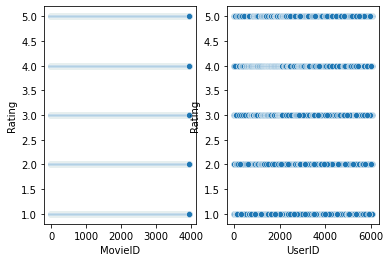

In [26]:
fig, ax = plt.subplots(1,2)
sns.scatterplot(x='MovieID', y='Rating', data=master_df, ax=ax[0])
sns.scatterplot(x='UserID', y='Rating', data=master_df, ax=ax[1])
plt.show()

So all the users give different ratings and each movie also gets different ratings.

Now we can check for any relation between Age and Rating.

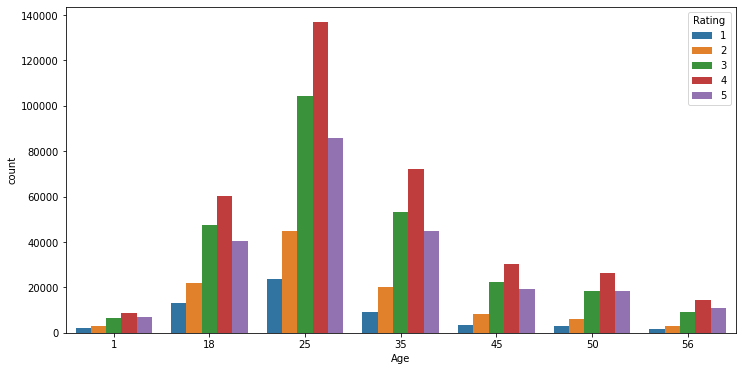

In [27]:
# Check Age and Rating
plt.figure(figsize=(12,6))
sns.countplot(x='Age', hue='Rating', data=master_df)
plt.show()

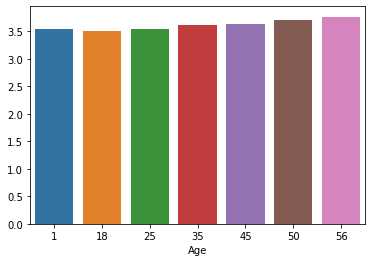

In [28]:
avg_rating_per_age = master_df.groupby('Age')['Rating'].mean()
sns.barplot(avg_rating_per_age.index, avg_rating_per_age.values)
plt.show()

We can see, the age group 25 gives more ratings than the others. But if we compare each ratings, the pattern is same for each type of age. They all give rating 4 and 5 most of the times annd then 3 and rarely give 1 and 2 ratings. All the age group give similar average rating to movies.

Similarly we can check for the Occupatio and Rating.

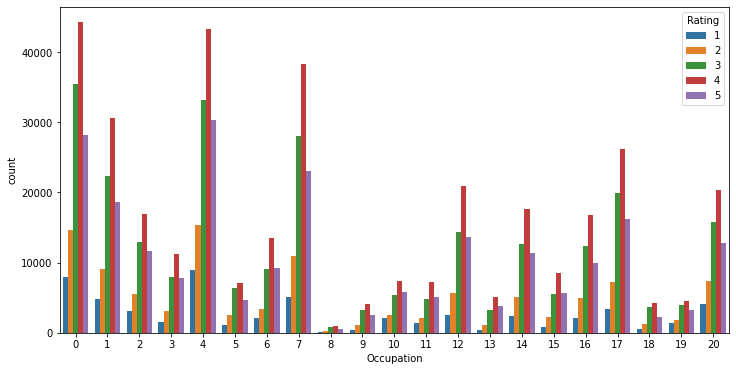

In [29]:
# Check Occupation and Rating

plt.figure(figsize=(12,6))
sns.countplot(x='Occupation', hue='Rating', data=master_df)
plt.show()

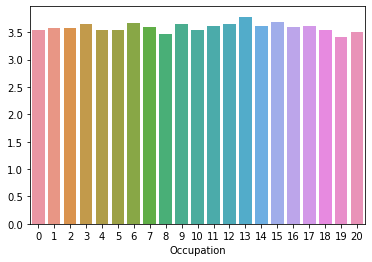

In [30]:
avg_rating_per_Occu = master_df.groupby('Occupation')['Rating'].mean()
sns.barplot(avg_rating_per_Occu.index, avg_rating_per_Occu.values)
plt.show()

People in all occupation give rating in similar way, they give rating 3,4,5 most of the time. Occupation types 0 to 7 they usually watch more movies and rate them than others. Again the average rating by all of them are similar.

Movie gere can be a factor for the ratings. So for each rating, we can analyze.

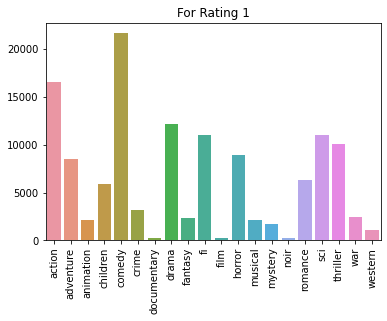

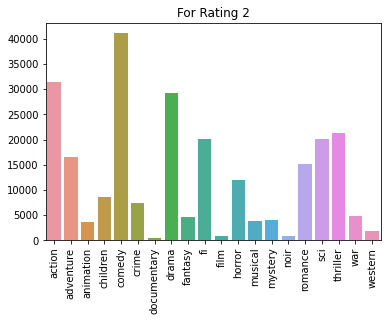

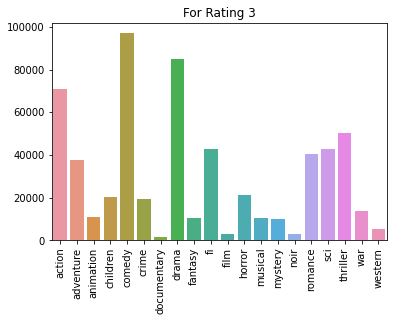

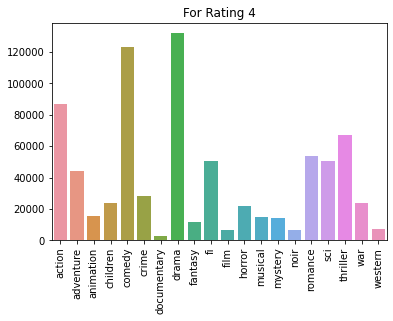

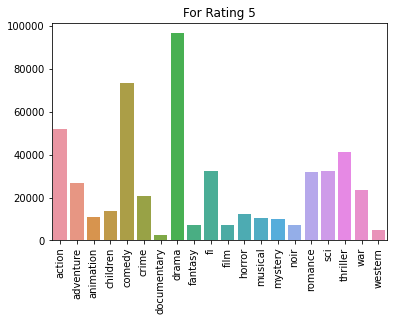

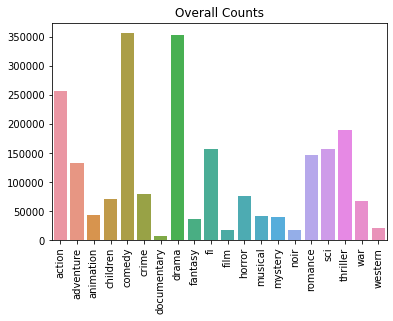

In [31]:
geners = master_df.columns[-20:]
for i in range(1,6):
    rating_i = master_df[geners][master_df['Rating'] == i]
    
    sns.barplot(geners, rating_i.sum())
    plt.xticks(rotation=90)
    plt.title('For Rating ' + str(i))
    plt.show()
    
rating_counts = master_df[geners]   
sns.barplot(geners, rating_counts.sum())
plt.xticks(rotation=90)
plt.title('Overall Counts')
plt.show()    

We are almost getting the similar pattern in case of all the ratings.

Movies with genre Drama gets high rating 3,4,5 with high counts. Comedy movies get all types of ratings.

So we can say, all the movie types get homogeneous ratings.

Through EDA, we are not getting enough insights on the data and its difficult to check the features affecting the ratings.

So we can build models on these data and try to get the scores and feature importances.

In [32]:
# Preprocessings

# As we have movieID, we dont need Title
master_df.drop('Title', axis=1, inplace=True)

x = master_df.drop('Rating', axis=1)
y = master_df['Rating']

In [33]:
# Lets try with all features except movieID and userID.

x_1 = x.iloc[:, 2:]

print(x_1.shape)
print(y.shape)

(1000209, 22)
(1000209,)


In [34]:
# Standardize the data

sc = StandardScaler()
x_1 = sc.fit_transform(x_1)
x = sc.fit_transform(x)

In [35]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1, y)
x_train, x_test, y_train, y_test = train_test_split(x, y)

print(x_train_1.shape)
print(x_test_1.shape)
print(y_train_1.shape)
print(y_test_1.shape)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(750156, 22)
(250053, 22)
(750156,)
(250053,)
(750156, 24)
(250053, 24)
(750156,)
(250053,)


In [36]:
# Logistic Regression

lrc1 = LogisticRegression(multi_class='multinomial')
lrc1.fit(x_train_1, y_train_1)

LogisticRegression(multi_class='multinomial')

In [37]:
print('LRC1 accuracy', lrc1.score(x_test_1, y_test_1))

LRC1 accuracy 0.3498978216618077


In [38]:
lrc2 = LogisticRegression(multi_class='multinomial')
lrc2.fit(x_train, y_train)

LogisticRegression(multi_class='multinomial')

In [39]:
print('LRC2 accuracy', lrc2.score(x_test, y_test))

LRC2 accuracy 0.35159346218601656


In [40]:
# Both of them similar ccuracy. We can go for F1 score
y_pred_1 = lrc1.predict(x_test_1)
y_pred = lrc2.predict(x_test)

print('F1-score for LRC1 ', f1_score(y_test_1, y_pred_1, average='macro'))
print('F1-score for LRC2 ', f1_score(y_test, y_pred, average='macro'))

F1-score for LRC1  0.14110934946328652
F1-score for LRC2  0.14714795057275598


We are getting similar result. So we can finalize the model which takes all the features. Now onwards we can add UserId and MovieId.

Now we can check the coefficients from the model for each rating and check the feature scores.

In [41]:
features = [f for f in master_df.columns if f != 'Rating']
print(len(features))
print(x.shape[1])

24
24


In [42]:
coeffs = lrc2.coef_

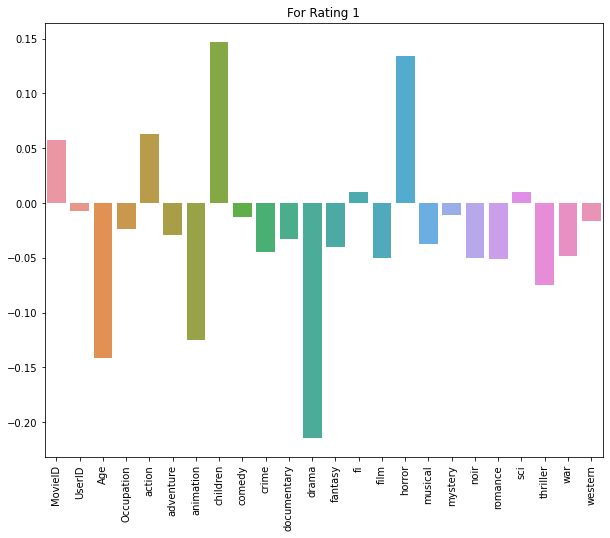

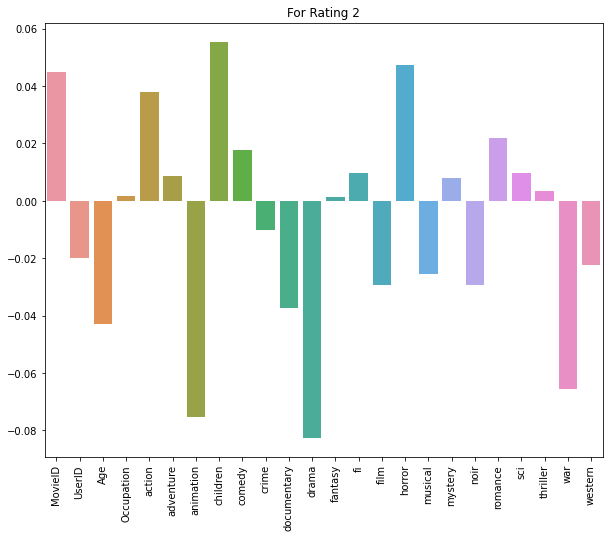

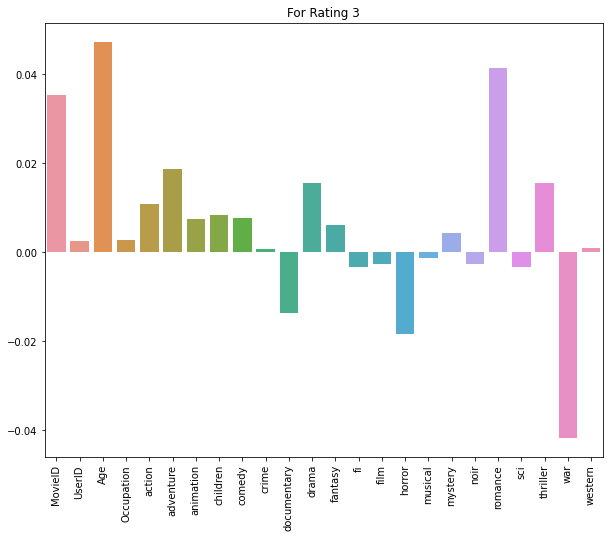

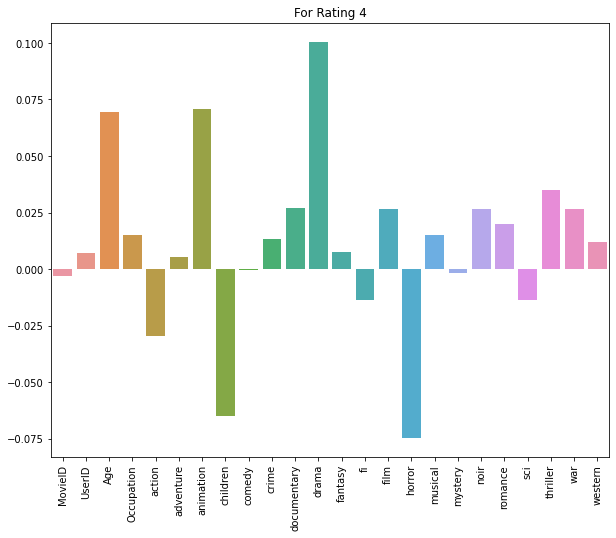

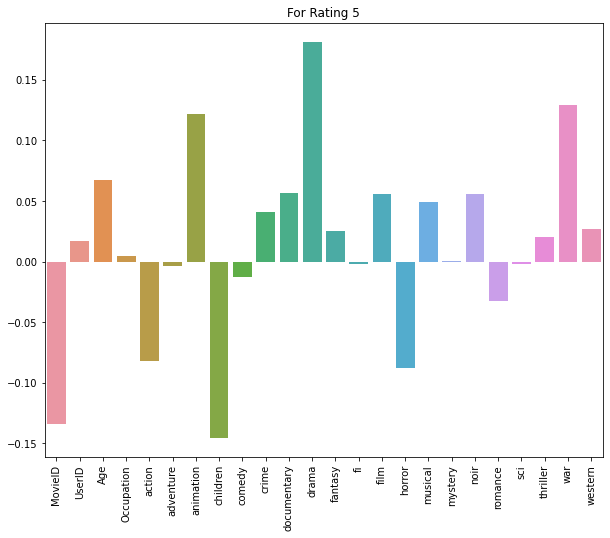

In [43]:
for i in range(1,6):
    coeff = coeffs[i-1]
    plt.figure(figsize=(10,8))
    sns.barplot(features, coeff)
    plt.title('For Rating ' + str(i))
    plt.xticks(rotation = 90)
    plt.show()

The coeff values certainly match with the rating counts we got in EDA for each rating and genres.

For high ratings like 4,5, the Drama, adventure, war genre affects it positively. For low ratings like 1,2, children and horror genres affects the most. The Age also contributes to the rating in some extent. 

For low ratings, movieID also give impact. Maybe these low ratings are specific to movies. UserID doesnt have much impact.

There are other genres which also have few impacts on the ratings.

In [44]:
# RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

print('RFC accuracy ', rfc.score(x_test, y_test))
print('F1 score for RFC ', f1_score(y_test, y_pred, average='macro'))

RFC accuracy  0.3416675664759071
F1 score for RFC  0.29610982719835


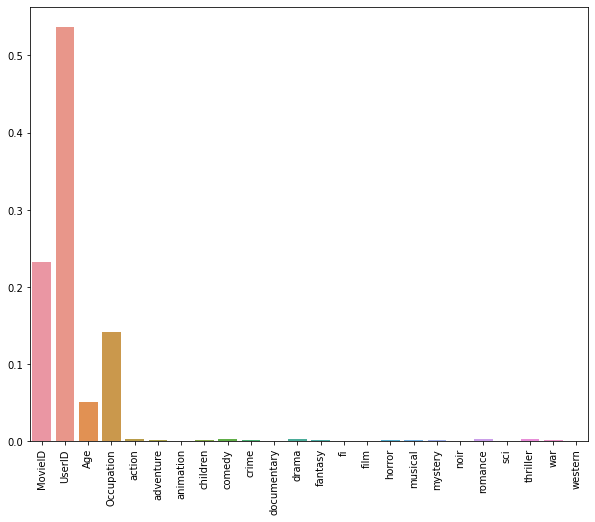

In [45]:
# plot feature importances

plt.figure(figsize=(10,8))
sns.barplot(features, rfc.feature_importances_)
plt.xticks(rotation = 90)
plt.show()

Here, userID, movieID give much high importances, by which others are getting negalated. So we can again plot only with the Genres features.

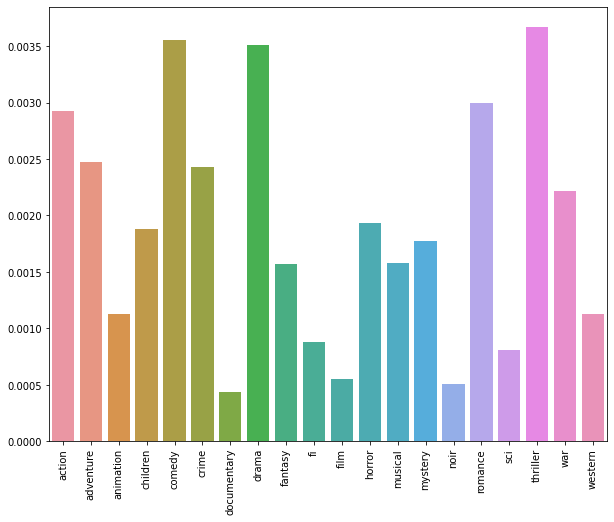

In [46]:
plt.figure(figsize=(10,8))
sns.barplot(features[-20:], rfc.feature_importances_[-20:])
plt.xticks(rotation = 90)
plt.show()

From this, we can say movies with genre as Drama, Comedy, Thriller, Romance and Action affects the most on deciding the ratings.

Both the models give similar accuarcy, but random forest gives more f1-score. So we can use that for prediction.